In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

#Loading the data
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [2]:
df.shape

(20640, 9)

In [3]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [4]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
#Exploratory Data Analysis (EDA)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


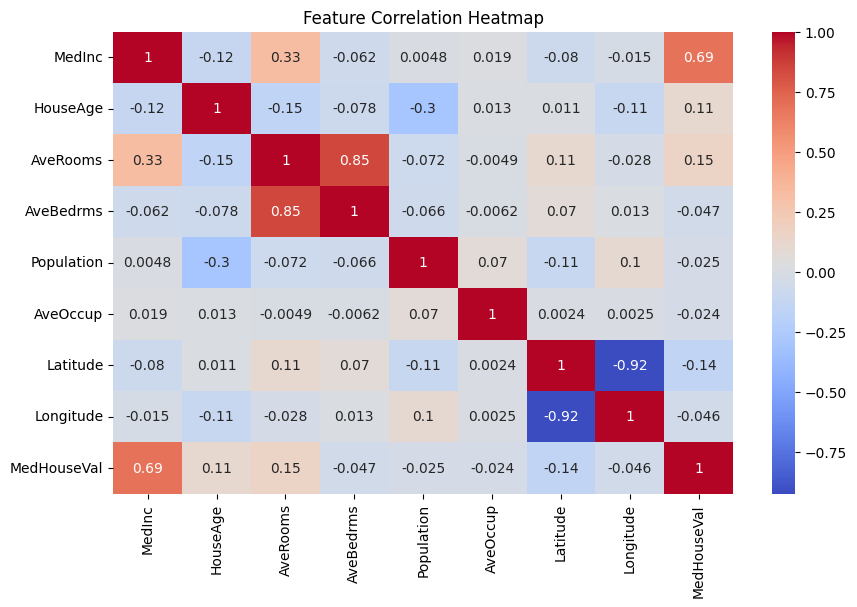

In [6]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

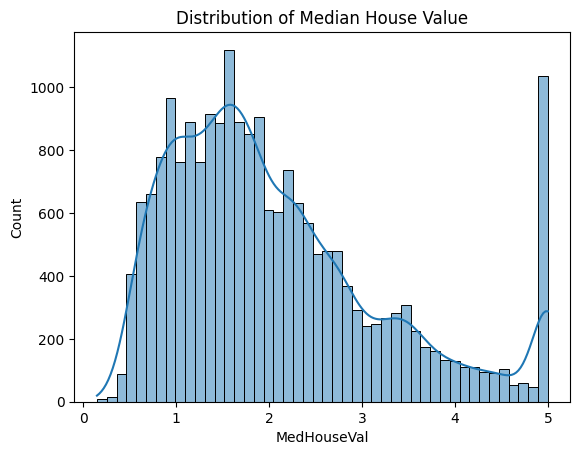

In [7]:
# Distribution of target
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Distribution of Median House Value")
plt.show()

In [9]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Ridge & Lasso Regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Training models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predicting
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluating
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nRidge Regression:")
print(f"MSE: {mse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")


Ridge Regression:
MSE: 0.5558
R² Score: 0.5759


In [10]:
print("\nLasso Regression:")
print(f"MSE: {mse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")


Lasso Regression:
MSE: 0.6135
R² Score: 0.5318


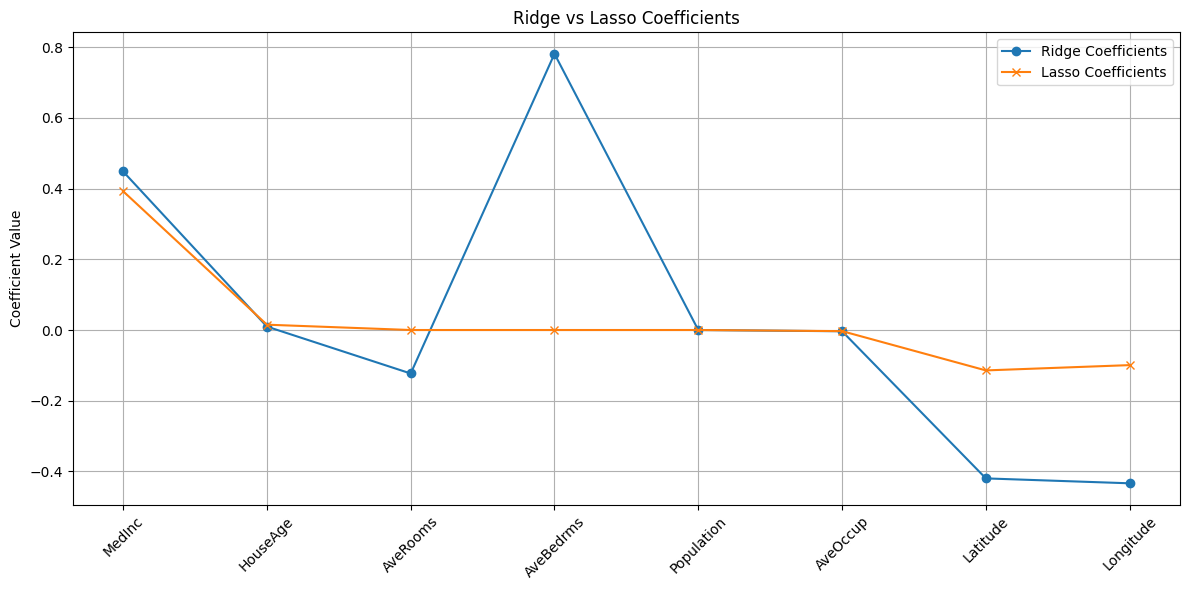

In [12]:
#Compare Coefficients Visually
# Coefficients plot
features = X.columns

plt.figure(figsize=(12,6))
plt.plot(features, ridge.coef_, marker='o', label='Ridge Coefficients')
plt.plot(features, lasso.coef_, marker='x', label='Lasso Coefficients')
plt.xticks(rotation=45)
plt.title("Ridge vs Lasso Coefficients")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
comparison_df = pd.DataFrame({
    'Feature': features,
    'Ridge Coefficient': ridge.coef_,
    'Lasso Coefficient': lasso.coef_
})
print("\nCoefficient Comparison:\n", comparison_df)


Coefficient Comparison:
       Feature  Ridge Coefficient  Lasso Coefficient
0      MedInc           0.448511           0.392693
1    HouseAge           0.009726           0.015081
2    AveRooms          -0.123014          -0.000000
3   AveBedrms           0.781417           0.000000
4  Population          -0.000002           0.000016
5    AveOccup          -0.003526          -0.003149
6    Latitude          -0.419787          -0.114291
7   Longitude          -0.433681          -0.099308
